In [11]:
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

print("version:", tf.__version__)
print("Eager mode:", tf.executing_eagerly())
print("Hub version:", hub.__version__)
print("GPU is", "available" if tf.config.list_physical_devices("GPU") else "NOT AVAILABLE")

version: 2.15.0
Eager mode: True
Hub version: 0.16.0.dev
GPU is NOT AVAILABLE


In [12]:
# batch_size -> 얼만큼 데이터를 나누어 처리를 할지 (-1은 한꺼번에 처리한다는 뜻)
# as_supervised = True -> 지도학습 형식으로 로드하겠다는 뜻
train_data, test_data = tfds.load(name='imdb_reviews', split=['train','test'],
                                  batch_size=-1,as_supervised=True)

train_examples, train_labels = tfds.as_numpy(train_data) # train_data를 numpy로 변환
test_examples, test_labels = tfds.as_numpy(test_data)

2023-12-20 20:21:45.713900: W external/local_tsl/tsl/platform/cloud/google_auth_provider.cc:184] All attempts to get a Google authentication bearer token failed, returning an empty token. Retrieving token from files failed with "NOT_FOUND: Could not locate the credentials file.". Retrieving token from GCE failed with "FAILED_PRECONDITION: Error executing an HTTP request: libcurl code 6 meaning 'Couldn't resolve host name', error details: Could not resolve host: metadata.google.internal".


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /Users/choejong-gyu/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete02BFNO/imdb_reviews-…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /Users/choejong-gyu/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete02BFNO/imdb_reviews-…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /Users/choejong-gyu/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete02BFNO/imdb_reviews-…

Dataset imdb_reviews downloaded and prepared to /Users/choejong-gyu/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [13]:
print("training entires : {}, test entries: {}".format(len(train_examples),len(test_examples)) )

training entires : 25000, test entries: 25000


In [14]:
train_examples[:10]

array([b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.",
       b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot 

In [15]:
train_labels[:10]

array([0, 0, 0, 1, 1, 1, 0, 0, 0, 0])

In [18]:
# 사전 훈련된 모델 'nnlm-en-dim50' 은 영어 텍스트를 벡터로 변환하는데 사용함.
# 텍스트 데이터를 받아 50차원의 벡터로 변환
model = "https://tfhub.dev/google/nnlm-en-dim50/2"
hub_layer = hub.KerasLayer(model,input_shape=[],dtype=tf.string,trainable=True)
hub_layer(train_examples[:3])

<tf.Tensor: shape=(3, 50), dtype=float32, numpy=
array([[ 0.5423195 , -0.0119017 ,  0.06337538,  0.06862972, -0.16776837,
        -0.10581174,  0.16865303, -0.04998824, -0.31148055,  0.07910346,
         0.15442263,  0.01488662,  0.03930153,  0.19772711, -0.12215476,
        -0.04120981, -0.2704109 , -0.21922152,  0.26517662, -0.80739075,
         0.25833532, -0.3100421 ,  0.28683215,  0.1943387 , -0.29036492,
         0.03862849, -0.7844411 , -0.0479324 ,  0.4110299 , -0.36388892,
        -0.58034706,  0.30269456,  0.3630897 , -0.15227164, -0.44391504,
         0.19462997,  0.19528408,  0.05666234,  0.2890704 , -0.28468323,
        -0.00531206,  0.0571938 , -0.3201318 , -0.04418665, -0.08550783,
        -0.55847436, -0.23336391, -0.20782952, -0.03543064, -0.17533456],
       [ 0.56338924, -0.12339553, -0.10862679,  0.7753425 , -0.07667089,
        -0.15752277,  0.01872335, -0.08169781, -0.3521876 ,  0.4637341 ,
        -0.08492756,  0.07166859, -0.00670817,  0.12686075, -0.19326553,
 

In [19]:
# 모델 생성

model = tf.keras.Sequential()

model.add(hub_layer)
model.add(tf.keras.layers.Dense(16,activation='relu'))
model.add(tf.keras.layers.Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 50)                48190600  
                                                                 
 dense (Dense)               (None, 16)                816       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 48191433 (183.84 MB)
Trainable params: 48191433 (183.84 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
# 모델 컴파일

model.compile(optimizer='adam',
              loss=tf.losses.BinaryCrossentropy(from_logits=True),
              metrics=[tf.metrics.BinaryAccuracy(threshold=0.0,name='accuracy')])

In [21]:
# 검증세트

x_val = train_examples[:10000]
partial_x_train = train_examples[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

In [22]:
# 모델 훈련

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val,y_val),
                    verbose=1)

Epoch 1/40
30/30 [==============================] - 8s 245ms/step - loss: 0.6591 - accuracy: 0.6206 - val_loss: 0.6102 - val_accuracy: 0.7184
Epoch 2/40
30/30 [==============================] - 7s 227ms/step - loss: 0.5557 - accuracy: 0.7717 - val_loss: 0.5150 - val_accuracy: 0.7849
Epoch 3/40
30/30 [==============================] - 6s 212ms/step - loss: 0.4280 - accuracy: 0.8478 - val_loss: 0.4059 - val_accuracy: 0.8338
Epoch 4/40
30/30 [==============================] - 6s 217ms/step - loss: 0.3024 - accuracy: 0.8965 - val_loss: 0.3390 - val_accuracy: 0.8584
Epoch 5/40
30/30 [==============================] - 6s 212ms/step - loss: 0.2129 - accuracy: 0.9281 - val_loss: 0.3113 - val_accuracy: 0.8710
Epoch 6/40
30/30 [==============================] - 9s 315ms/step - loss: 0.1536 - accuracy: 0.9533 - val_loss: 0.3024 - val_accuracy: 0.8750
Epoch 7/40
30/30 [==============================] - 8s 248ms/step - loss: 0.1102 - accuracy: 0.9711 - val_loss: 0.3032 - val_accuracy: 0.8762
Epoch 

In [23]:
# 모델 평가

results = model.evaluate(test_examples,test_labels)
print(results)

782/782 [==============================] - 20s 25ms/step - loss: 0.6169 - accuracy: 0.8473
[0.6169247627258301, 0.847320020198822]


In [25]:
# 정확도 및 손실 그래프 생성

history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [26]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

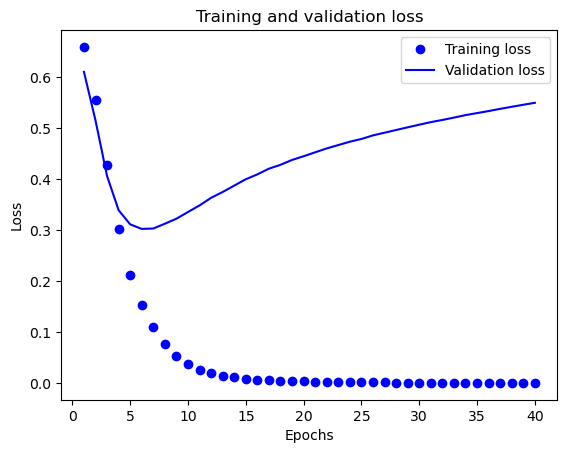

In [28]:
epochs = range(1,len(acc)+1)



plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel("Loss")
plt.legend()

plt.show()

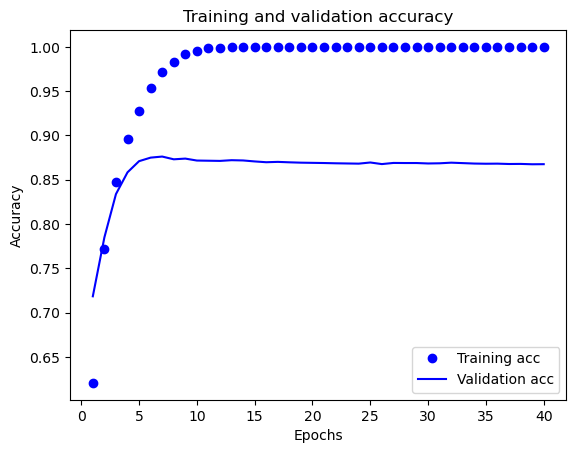

In [29]:
plt.clf()

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs, val_acc,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()